## Imports

In [1]:
import warnings

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Create DataFrame
___

In [2]:
articles = pd.read_csv('../Datasets/articles_scrape.csv')

/Users/jackrayner/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3106: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
articles.head()

,abstract,web_url,snippet,lead_paragraph,source,multimedia,headline,keywords,pub_date,document_type,...,section_name,byline,type_of_material,_id,word_count,uri,print_section,print_page,subsection_name,slideshow_credits
0,"The United States, supported by Britain, today...",https://www.nytimes.com/2001/10/07/internation...,"The United States, supported by Britain, today...","The United States, supported by Britain, toda...",The New York Times,[],"{'main': ""U.S. and Britain Clearing Way for 'R...","[{'name': 'glocations', 'value': 'The United S...",2001-10-07T05:00:00+0000,article,...,World,{'original': 'By Christopher S. Wren and Jacqu...,News,nyt://article/02612e18-76c0-5447-bace-71473568...,1333,nyt://article/02612e18-76c0-5447-bace-71473568...,NaN,NaN,NaN,NaN
1,"Government can be expected to try to control, ...",https://www.nytimes.com/2001/10/07/weekinrevie...,"Government can be expected to try to control, ...","IT will be, Americans have already been warned...",The New York Times,[],"{'main': ""The World: Information at Risk; What...","[{'name': 'subject', 'value': 'World Trade Cen...",2001-10-07T05:00:00+0000,article,...,Week in Review,"{'original': 'By Todd S. Purdum', 'person': [{...",News,nyt://article/0abd157f-d390-5787-bf89-4e87dad4...,1322,nyt://article/0abd157f-d390-5787-bf89-4e87dad4...,4,1.0,NaN,NaN
2,Richard B Woodward interviews photographer Edw...,https://www.nytimes.com/2001/10/07/arts/art-ar...,Richard B Woodward interviews photographer Edw...,THE photographer Edward Grazda first visited A...,The New York Times,[],{'main': 'Art/Architecture; Images of Afghanis...,"[{'name': 'glocations', 'value': 'Afghanistan'...",2001-10-07T05:00:00+0000,article,...,Arts,"{'original': None, 'person': [], 'organization...",Interview,nyt://article/15581e37-54ea-5aa4-bc80-34588ab1...,1638,nyt://article/15581e37-54ea-5aa4-bc80-34588ab1...,2,34.0,NaN,NaN
3,"Violence Policy Center, Washington-based group...",https://www.nytimes.com/2001/10/07/us/a-nation...,"Violence Policy Center, Washington-based group...","In the late 1980's, an American-based agent fo...",The New York Times,[],"{'main': ""In 80's, Afghan Militias Used U.S. R...","[{'name': 'glocations', 'value': 'New York Cit...",2001-10-07T05:00:00+0000,article,...,U.S.,"{'original': 'By James Dao', 'person': [{'firs...",News,nyt://article/17f9cbdb-ff36-5df1-8a37-5c02edbb...,603,nyt://article/17f9cbdb-ff36-5df1-8a37-5c02edbb...,B,1.0,NaN,NaN
4,Sending bright flashes of light and loud concu...,https://www.nytimes.com/2001/10/07/internation...,Sending bright flashes of light and loud concu...,"TOPDARA, Afghanistan, Oct. 7 — Sending bright...",The New York Times,[],"{'main': 'Thunderous Attack Heard in Kabul', '...","[{'name': 'glocations', 'value': 'Afghanistan'...",2001-10-07T05:00:00+0000,article,...,World,"{'original': 'By David Rohde', 'person': [{'fi...",News,nyt://article/1a2a8209-9dd4-501b-a988-0c2adfc9...,611,nyt://article/1a2a8209-9dd4-501b-a988-0c2adfc9...,NaN,NaN,NaN,NaN


## Finding Duplicates

In [4]:
articles.duplicated().sum()

0

# Cleaning
___

In [5]:
articles.dtypes

abstract             object
web_url              object
snippet              object
lead_paragraph       object
source               object
multimedia           object
headline             object
keywords             object
pub_date             object
document_type        object
news_desk            object
section_name         object
byline               object
type_of_material     object
_id                  object
word_count            int64
uri                  object
print_section        object
print_page           object
subsection_name      object
slideshow_credits    object
dtype: object

Headline, Keywords, and Byline are dictionaries that have been converted to Strings. These should be converted back to their original data type in order to filter their information

## Cleaning the string columns

In [6]:
string_cols = ['headline', 'keywords', 'byline']

In [7]:
articles[string_cols]

,headline,keywords,byline
0,"{'main': ""U.S. and Britain Clearing Way for 'R...","[{'name': 'glocations', 'value': 'The United S...",{'original': 'By Christopher S. Wren and Jacqu...
1,"{'main': ""The World: Information at Risk; What...","[{'name': 'subject', 'value': 'World Trade Cen...","{'original': 'By Todd S. Purdum', 'person': [{..."
2,{'main': 'Art/Architecture; Images of Afghanis...,"[{'name': 'glocations', 'value': 'Afghanistan'...","{'original': None, 'person': [], 'organization..."
3,"{'main': ""In 80's, Afghan Militias Used U.S. R...","[{'name': 'glocations', 'value': 'New York Cit...","{'original': 'By James Dao', 'person': [{'firs..."
4,"{'main': 'Thunderous Attack Heard in Kabul', '...","[{'name': 'glocations', 'value': 'Afghanistan'...","{'original': 'By David Rohde', 'person': [{'fi..."
...,...,...,...
37393,{'main': 'How Does Biden Recover From His Week...,"[{'name': 'persons', 'value': 'Biden, Joseph R...",{'original': 'By Gail Collins and Bret Stephen...
37394,{'main': 'Can Afghanistan’s Leading Broadcaste...,"[{'name': 'subject', 'value': 'News and News M...","{'original': 'By Dan Bilefsky', 'person': [{'f..."
37395,"{'main': 'At Kabul airport, a sense of calm an...",[],"{'original': 'By Megan Specia, Jim Huylebroek,..."
37396,{'main': 'North Korea Restarted Plutonium-Prod...,"[{'name': 'glocations', 'value': 'North Korea'...","{'original': 'By Choe Sang-Hun', 'person': [{'..."


In [8]:
articles[string_cols] = pd.DataFrame({col:articles[col].map(lambda x: x.replace("\'", "\"")) for col in string_cols})

In [9]:
articles[string_cols]

,headline,keywords,byline
0,"{""main"": ""U.S. and Britain Clearing Way for ""R...","[{""name"": ""glocations"", ""value"": ""The United S...","{""original"": ""By Christopher S. Wren and Jacqu..."
1,"{""main"": ""The World: Information at Risk; What...","[{""name"": ""subject"", ""value"": ""World Trade Cen...","{""original"": ""By Todd S. Purdum"", ""person"": [{..."
2,"{""main"": ""Art/Architecture; Images of Afghanis...","[{""name"": ""glocations"", ""value"": ""Afghanistan""...","{""original"": None, ""person"": [], ""organization..."
3,"{""main"": ""In 80""s, Afghan Militias Used U.S. R...","[{""name"": ""glocations"", ""value"": ""New York Cit...","{""original"": ""By James Dao"", ""person"": [{""firs..."
4,"{""main"": ""Thunderous Attack Heard in Kabul"", ""...","[{""name"": ""glocations"", ""value"": ""Afghanistan""...","{""original"": ""By David Rohde"", ""person"": [{""fi..."
...,...,...,...
37393,"{""main"": ""How Does Biden Recover From His Week...","[{""name"": ""persons"", ""value"": ""Biden, Joseph R...","{""original"": ""By Gail Collins and Bret Stephen..."
37394,"{""main"": ""Can Afghanistan’s Leading Broadcaste...","[{""name"": ""subject"", ""value"": ""News and News M...","{""original"": ""By Dan Bilefsky"", ""person"": [{""f..."
37395,"{""main"": ""At Kabul airport, a sense of calm an...",[],"{""original"": ""By Megan Specia, Jim Huylebroek,..."
37396,"{""main"": ""North Korea Restarted Plutonium-Prod...","[{""name"": ""glocations"", ""value"": ""North Korea""...","{""original"": ""By Choe Sang-Hun"", ""person"": [{""..."


### Headline Column

In [10]:
articles['headline'][0]

'{"main": "U.S. and Britain Clearing Way for "Relentless" Campaign, Bush Says", "kicker": None, "content_kicker": None, "print_headline": "U.S. and Britain Clearing Way for "Relentless" Campaign, Bush Says", "name": None, "seo": None, "sub": None}'

In [11]:
# code to extract only the main section of headline
articles['headline'][0].split(', "kicker"')[0][1:].split(': ')[1]

'"U.S. and Britain Clearing Way for "Relentless" Campaign, Bush Says"'

In [12]:
# universal headline strip
articles['headline'] = articles['headline'].map(lambda x: x.split(', "kicker"')[0][1:].split(': ')[1]) 

### Byline Column

In [13]:
articles['byline'][0]

'{"original": "By Christopher S. Wren and Jacques Steinberg", "person": [{"firstname": "Christopher", "middlename": "S.", "lastname": "Wren", "qualifier": None, "title": None, "role": "reported", "organization": "", "rank": 1}, {"firstname": "Jacques", "middlename": None, "lastname": "Steinberg", "qualifier": None, "title": None, "role": "reported", "organization": "", "rank": 2}], "organization": None}'

In [14]:
articles.drop(columns='byline', inplace=True)

__Byline can be dropped__

### Keywords Column

In [15]:
articles['keywords'][0]

'[{"name": "glocations", "value": "The United States", "rank": 1, "major": "N"}, {"name": "organizations", "value": "Taliban", "rank": 2, "major": "N"}, {"name": "persons", "value": "Rhode, David", "rank": 3, "major": "N"}, {"name": "subject", "value": "Television", "rank": 4, "major": "N"}, {"name": "subject", "value": "Terrorism", "rank": 5, "major": "N"}, {"name": "subject", "value": "Airlines and Airplanes", "rank": 6, "major": "N"}]'

In [16]:
def Convert_dict(lst):
    res_dct = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return res_dct

In [17]:
def find_keywords(kys_dict):
    keywords_list = []
    for kword in kys_dict[2: -2].split('}, {'):
        for item in kword.split(', '):
            keywords_list.append([item2.strip('""') for item2 in item.split(': ')])

    keywords_dict_list = []
    for items in [Convert_dict(kword) for kword in keywords_list if len(kword) %2 ==0]:
        keywords_dict_list.append(''.join(v for k,v in items.items() if k == 'value'))

    for item in keywords_dict_list:
        if len(item) <= 1:
            keywords_dict_list.remove(item)
    return ' '.join(keywords_dict_list)

In [18]:
find_keywords(articles['keywords'][52])

'Germany New York City Washington (DC) Bush bin Laden World Trade Center (NYC) Airlines and Airplanes United States International Relations Pentagon Building Missing Persons    Freedom of Speech and Expression    Hijacking    Terrorism    UNITED STATES ARMAMENT AND DEFENSE  '

In [19]:
articles['keywords'] = articles['keywords'].map(lambda x: find_keywords(x)) 

__Keywords have been extracted and joined to one string__

### Check Columns

In [20]:
articles.head()

,abstract,web_url,snippet,lead_paragraph,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,type_of_material,_id,word_count,uri,print_section,print_page,subsection_name,slideshow_credits
0,"The United States, supported by Britain, today...",https://www.nytimes.com/2001/10/07/internation...,"The United States, supported by Britain, today...","The United States, supported by Britain, toda...",The New York Times,[],"""U.S. and Britain Clearing Way for ""Relentless...",The United States Taliban Rhode Television Te...,2001-10-07T05:00:00+0000,article,International,World,News,nyt://article/02612e18-76c0-5447-bace-71473568...,1333,nyt://article/02612e18-76c0-5447-bace-71473568...,NaN,NaN,NaN,NaN
1,"Government can be expected to try to control, ...",https://www.nytimes.com/2001/10/07/weekinrevie...,"Government can be expected to try to control, ...","IT will be, Americans have already been warned...",The New York Times,[],"""The World",World Trade Center (NYC) Airlines and Airplane...,2001-10-07T05:00:00+0000,article,Week in Review Desk,Week in Review,News,nyt://article/0abd157f-d390-5787-bf89-4e87dad4...,1322,nyt://article/0abd157f-d390-5787-bf89-4e87dad4...,4,1.0,NaN,NaN
2,Richard B Woodward interviews photographer Edw...,https://www.nytimes.com/2001/10/07/arts/art-ar...,Richard B Woodward interviews photographer Edw...,THE photographer Edward Grazda first visited A...,The New York Times,[],"""Art/Architecture; Images of Afghanistan, Befo...",Afghanistan Grazda Woodward Photography,2001-10-07T05:00:00+0000,article,Arts and Leisure Desk,Arts,Interview,nyt://article/15581e37-54ea-5aa4-bc80-34588ab1...,1638,nyt://article/15581e37-54ea-5aa4-bc80-34588ab1...,2,34.0,NaN,NaN
3,"Violence Policy Center, Washington-based group...",https://www.nytimes.com/2001/10/07/us/a-nation...,"Violence Policy Center, Washington-based group...","In the late 1980's, an American-based agent fo...",The New York Times,[],"""In 80""s, Afghan Militias Used U.S. Rifles""",New York City Russia Washington (DC) Afghanist...,2001-10-07T05:00:00+0000,article,National Desk,U.S.,News,nyt://article/17f9cbdb-ff36-5df1-8a37-5c02edbb...,603,nyt://article/17f9cbdb-ff36-5df1-8a37-5c02edbb...,B,1.0,NaN,NaN
4,Sending bright flashes of light and loud concu...,https://www.nytimes.com/2001/10/07/internation...,Sending bright flashes of light and loud concu...,"TOPDARA, Afghanistan, Oct. 7 — Sending bright...",The New York Times,[],"""Thunderous Attack Heard in Kabul""",Afghanistan Taliban Dostum United States Polit...,2001-10-07T05:00:00+0000,article,International,World,News,nyt://article/1a2a8209-9dd4-501b-a988-0c2adfc9...,611,nyt://article/1a2a8209-9dd4-501b-a988-0c2adfc9...,NaN,NaN,NaN,NaN


### Convert time to pandas datetime

In [21]:
articles['pub_date'] = pd.to_datetime(articles['pub_date'])

### Check datatypes

In [22]:
articles.dtypes

abstract                          object
web_url                           object
snippet                           object
lead_paragraph                    object
source                            object
multimedia                        object
headline                          object
keywords                          object
pub_date             datetime64[ns, UTC]
document_type                     object
news_desk                         object
section_name                      object
type_of_material                  object
_id                               object
word_count                         int64
uri                               object
print_section                     object
print_page                        object
subsection_name                   object
slideshow_credits                 object
dtype: object

### Remove Unnecessary Columns

In [23]:
articles.drop(
    columns=['web_url', 'source', 'multimedia','document_type', '_id', 'web_url', 'print_section','print_page', 'subsection_name', 'slideshow_credits'], 
    inplace=True
)

## Adding feature columns
___

In [24]:
article_text_cols = ['abstract', 'snippet', 'lead_paragraph', 'headline']

In [25]:
articles[article_text_cols]

,abstract,snippet,lead_paragraph,headline
0,"The United States, supported by Britain, today...","The United States, supported by Britain, today...","The United States, supported by Britain, toda...","""U.S. and Britain Clearing Way for ""Relentless..."
1,"Government can be expected to try to control, ...","Government can be expected to try to control, ...","IT will be, Americans have already been warned...","""The World"
2,Richard B Woodward interviews photographer Edw...,Richard B Woodward interviews photographer Edw...,THE photographer Edward Grazda first visited A...,"""Art/Architecture; Images of Afghanistan, Befo..."
3,"Violence Policy Center, Washington-based group...","Violence Policy Center, Washington-based group...","In the late 1980's, an American-based agent fo...","""In 80""s, Afghan Militias Used U.S. Rifles"""
4,Sending bright flashes of light and loud concu...,Sending bright flashes of light and loud concu...,"TOPDARA, Afghanistan, Oct. 7 — Sending bright...","""Thunderous Attack Heard in Kabul"""
...,...,...,...,...
37393,"It won’t be easy, but it won’t be impossible, ...","It won’t be easy, but it won’t be impossible, ...","Bret Stephens: Hello, Gail. I hope these last ...","""How Does Biden Recover From His Week From Hell?"""
37394,Tolo came to prominence with hard-hitting news...,Tolo came to prominence with hard-hitting news...,"Over the past two decades, the Afghan broadcas...","""Can Afghanistan’s Leading Broadcaster Survive..."
37395,In the final hours of the American military pr...,NaN,In the final hours of the American military pr...,"""At Kabul airport, a sense of calm and resigna..."
37396,​The activities at the sprawling nuclear compl...,​The activities at the sprawling nuclear compl...,SEOUL — North Korea appears to have restarted ...,"""North Korea Restarted Plutonium-Producing Rea..."


In [26]:
articles[article_text_cols] = articles.copy()[article_text_cols].fillna('')
articles['all_text'] = articles[article_text_cols].agg(' - '.join, axis=1)

#### The data is filtered and ready for addding the sentiment column

In [27]:
sia = SentimentIntensityAnalyzer()

In [28]:
def extract_sentiment(post):
    scores = sia.polarity_scores(post)
    return scores['compound']

In [29]:
articles['overall_sentiment'] = articles['all_text'].map(extract_sentiment)
# articles['overall_sentiment'] = (articles[article_text_cols].agg('-'.join, axis=1)).map(extract_sentiment)

In [30]:
articles.head()

,abstract,snippet,lead_paragraph,headline,keywords,pub_date,news_desk,section_name,type_of_material,word_count,uri,all_text,overall_sentiment
0,"The United States, supported by Britain, today...","The United States, supported by Britain, today...","The United States, supported by Britain, toda...","""U.S. and Britain Clearing Way for ""Relentless...",The United States Taliban Rhode Television Te...,2001-10-07 05:00:00+00:00,International,World,News,1333,nyt://article/02612e18-76c0-5447-bace-71473568...,"The United States, supported by Britain, today...",-0.9648
1,"Government can be expected to try to control, ...","Government can be expected to try to control, ...","IT will be, Americans have already been warned...","""The World",World Trade Center (NYC) Airlines and Airplane...,2001-10-07 05:00:00+00:00,Week in Review Desk,Week in Review,News,1322,nyt://article/0abd157f-d390-5787-bf89-4e87dad4...,"Government can be expected to try to control, ...",-0.9761
2,Richard B Woodward interviews photographer Edw...,Richard B Woodward interviews photographer Edw...,THE photographer Edward Grazda first visited A...,"""Art/Architecture; Images of Afghanistan, Befo...",Afghanistan Grazda Woodward Photography,2001-10-07 05:00:00+00:00,Arts and Leisure Desk,Arts,Interview,1638,nyt://article/15581e37-54ea-5aa4-bc80-34588ab1...,Richard B Woodward interviews photographer Edw...,-0.6815
3,"Violence Policy Center, Washington-based group...","Violence Policy Center, Washington-based group...","In the late 1980's, an American-based agent fo...","""In 80""s, Afghan Militias Used U.S. Rifles""",New York City Russia Washington (DC) Afghanist...,2001-10-07 05:00:00+00:00,National Desk,U.S.,News,603,nyt://article/17f9cbdb-ff36-5df1-8a37-5c02edbb...,"Violence Policy Center, Washington-based group...",-0.9661
4,Sending bright flashes of light and loud concu...,Sending bright flashes of light and loud concu...,"TOPDARA, Afghanistan, Oct. 7 — Sending bright...","""Thunderous Attack Heard in Kabul""",Afghanistan Taliban Dostum United States Polit...,2001-10-07 05:00:00+00:00,International,World,News,611,nyt://article/1a2a8209-9dd4-501b-a988-0c2adfc9...,Sending bright flashes of light and loud concu...,0.9022


In [31]:
articles.loc[4]['snippet']

'Sending bright flashes of light and loud concussions rolling across the farming plain just 35 miles north of Kabul, American military forces began what looked like a steady bombardment.'

90.22 % positive?

#### Export Cleaned Dataset for Modeling:

In [32]:
articles.to_csv('../Datasets/articles_clean.csv', index=False)

## Analysis and insights
___

### Sentiment

In [33]:
articles['type_of_material'].value_counts()

News                              24855
Op-Ed                              2526
Letter                             1254
Review                              875
Editorial                           872
briefing                            862
List                                660
Summary                             598
Video                               557
Correction                          351
Interactive Feature                 329
Web Log                             291
News Analysis                       274
Schedule                            253
Brief                               204
Slideshow                           197
Text                                179
Obituary (Obit)                     169
An Analysis; News Analysis           80
Transcript                           74
Series                               63
Biography                            63
Quote                                51
Results Listing                      43
Question                             40


In [34]:
{material:articles[articles['type_of_material'] ==material]['overall_sentiment'].mean() for material in set(articles['type_of_material'])}

{nan: nan,
 'Special Report': -0.10171363636363635,
 'Recipe': 0.0,
 'Slideshow': -0.11684010152284262,
 'Question': -0.04443499999999999,
 'Sidebar': -0.31939687499999997,
 'An Appraisal': -0.9299,
 'Web Log': -0.027097250859106536,
 'Obituary': 0.8625,
 'List': -0.7515277272727252,
 'Series; Interview': -0.21419999999999997,
 "Editors' Note": -0.5477222222222222,
 'Text': -0.02145977653631283,
 'Review': -0.10059531428571433,
 'QandA': 0.0,
 'Interview; Series': -0.9943,
 'Biography': -0.002841269841269842,
 'Quote': 0.012978431372549025,
 'Obituary (Obit)': -0.26679644970414207,
 'Newsletter': 0.25975,
 'briefing': 0.0562293503480278,
 'Obituary; Biography': -0.30137619047619046,
 'Chronology': -0.4229909090909091,
 'Summary': -0.5400740802675584,
 'Brief': -0.5259431372549019,
 'Op-Ed': -0.17106682501979395,
 'News': -0.26320643331321364,
 'Interactive Feature': -0.08334832826747725,
 'An Analysis; Military Analysis': -0.6973399999999998,
 'First Chapter': 0.18111249999999998,
 'Ne

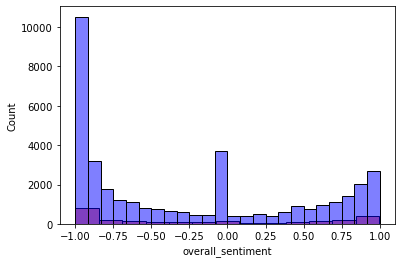

In [35]:
sns.histplot(articles[articles['type_of_material']=='Op-Ed']['overall_sentiment'], alpha=.5, color='r')
sns.histplot(articles['overall_sentiment'], alpha=.5, color='b');

Op Eds Seem to have a less neutral tone overall, but also less negative 

In [36]:
material_sentiment

NameError: name 'material_sentiment' is not defined

In [ ]:
sentiment_time = pd.DataFrame(articles.groupby('pub_date').mean()['overall_sentiment'])

In [ ]:
sentiment_time.head()

In [ ]:
sentiment_time.shape

In [ ]:
sentiment_time.resample('M').mean()

In [ ]:
# Code modified from code written by Matthew Garton.

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

In [ ]:
plot_series(sentiment_time.resample('M').mean(), ['overall_sentiment'], 'Overall Sentiment of articles Addressing the war in Afganistan')

### Show the 15 frequency of the most common words
___

#### Create top words pipeline

In [ ]:
def get_title(df):
    return df['all_text']

get_title_trasnformer = FunctionTransformer(get_title, validate=False)

In [ ]:
def sparse_to_dense(sparse_matrix):
    return np.asarray(sparse_matrix.todense())

sparse_to_dense_trasnformer = FunctionTransformer(sparse_to_dense, validate=False)

In [ ]:
pipe = Pipeline([
    ('title_transform', get_title_trasnformer),
    ('cvec', CountVectorizer(stop_words='english')),
    ('sparse_to_dense_trasnformer', sparse_to_dense_trasnformer)
])

In [ ]:
cvec_text = CountVectorizer(stop_words='english')
cvec_text.fit(articles['all_text'])

In [ ]:
articles_cvec = pd.DataFrame(pipe.fit_transform(articles), columns=cvec_text.get_feature_names_out())

In [ ]:
top_words = articles_cvec.sum().sort_values(ascending=False)[:15]

In [ ]:
top_words